#Import

In [ ]:
!pip install spicy

In [ ]:
import numpy as np

import torch
import torch.nn as nn
from torch.autograd import Variable

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Sample supervised data

In [ ]:
import random

numbers = list(range(0, 512))

random_numbers = random.sample(numbers, 200)

print(random_numbers)

a = 0

for i in random_numbers:
    for j in random_numbers:
        if i == j :
            a += 1
print(a)

[181, 315, 459, 376, 90, 282, 249, 287, 421, 490, 17, 410, 214, 380, 219, 388, 329, 461, 261, 132, 309, 437, 16, 408, 224, 152, 338, 263, 52, 252, 41, 466, 467, 236, 13, 186, 476, 270, 240, 278, 114, 165, 389, 211, 414, 299, 36, 162, 28, 150, 330, 220, 210, 336, 259, 144, 99, 80, 292, 201, 123, 227, 137, 456, 355, 378, 349, 356, 384, 451, 129, 498, 301, 177, 272, 67, 248, 145, 411, 295, 506, 511, 189, 238, 197, 439, 475, 400, 105, 213, 447, 241, 468, 151, 392, 474, 365, 312, 4, 332, 374, 391, 480, 9, 398, 341, 14, 487, 119, 322, 143, 243, 452, 291, 93, 194, 483, 416, 185, 82, 160, 25, 445, 229, 345, 103, 212, 73, 218, 314, 113, 353, 61, 484, 34, 1, 260, 264, 51, 242, 161, 159, 497, 344, 26, 284, 193, 472, 43, 303, 20, 386, 96, 47, 351, 373, 112, 469, 440, 271, 297, 230, 148, 276, 46, 58, 471, 153, 7, 203, 363, 136, 174, 204, 488, 375, 86, 319, 331, 109, 415, 173, 42, 434, 478, 76, 337, 154, 450, 247, 465, 431, 95, 427, 281, 206, 397, 326, 444, 106]
200


In [ ]:
random_numbers = [181, 315, 459, 376, 90, 282, 249, 287, 421, 490, 17, 410, 214, 380, 219, 388, 329, 461, 261, 132, 309, 437, 16, 408, 224, 152, 338, 263, 52, 252, 41, 466, 467, 236, 13, 186, 476, 270, 240, 278, 114, 165, 389, 211, 414, 299, 36, 162, 28, 150, 330, 220, 210, 336, 259, 144, 99, 80, 292, 201, 123, 227, 137, 456, 355, 378, 349, 356, 384, 451, 129, 498, 301, 177, 272, 67, 248, 145, 411, 295, 506, 511, 189, 238, 197, 439, 475, 400, 105, 213, 447, 241, 468, 151, 392, 474, 365, 312, 4, 332, 374, 391, 480, 9, 398, 341, 14, 487, 119, 322, 143, 243, 452, 291, 93, 194, 483, 416, 185, 82, 160, 25, 445, 229, 345, 103, 212, 73, 218, 314, 113, 353, 61, 484, 34, 1, 260, 264, 51, 242, 161, 159, 497, 344, 26, 284, 193, 472, 43, 303, 20, 386, 96, 47, 351, 373, 112, 469, 440, 271, 297, 230, 148, 276, 46, 58, 471, 153, 7, 203, 363, 136, 174, 204, 488, 375, 86, 319, 331, 109, 415, 173, 42, 434, 478, 76, 337, 154, 450, 247, 465, 431, 95, 427, 281, 206, 397, 326, 444, 106]
print(len(random_numbers))

200


#Load solution data

In [ ]:
from spicy import io

mat_file = io.loadmat('/content/AC.mat')

In [ ]:
Solution = mat_file['uu']
Solution1 = Variable(torch.from_numpy(Solution).float(), requires_grad=False).to(device)

Solution1.size()

torch.Size([512, 201])

In [ ]:
x1 = mat_file['x']
t1 = mat_file['tt']

ms_t1, ms_x1= np.meshgrid(t1,x1)

ob_x1 = np.ravel(ms_x1).reshape(-1,1)
ob_t1 = np.ravel(ms_t1).reshape(-1,1)

label_x = Variable(torch.from_numpy(ob_x1).float(), requires_grad=False).to(device)
label_t = Variable(torch.from_numpy(ob_t1).float(), requires_grad=False).to(device)

# Supervise dataset

In [ ]:
sv_data1 = mat_file["uu"][:,20]
sv_data = []
sv_data_array = np.array([])

sv_point1 = mat_file["x"][0]
sv_point = []
sv_point_array = np.array([])

for i in random_numbers:
    sv_data.append(sv_data1[i])
    sv_point.append(sv_point1[i])

sv_data_array = np.append(sv_data_array,sv_data)
sv_data_array = sv_data_array.reshape(200,1)

sv_point_array = np.append(sv_point_array,sv_point)
sv_point_array = sv_point_array.reshape(200,1)

sv_t = np.ones((200,1))*0.1

# sv_t
print(sv_data_array)

print(sv_point_array)
# sv_data

[[ 8.54516710e-02]
 [ 6.55017993e-02]
 [-6.89851106e-01]
 [ 3.53972505e-02]
 [-3.02614146e-01]
 [ 1.61698757e-02]
 [ 1.26040643e-03]
 [ 2.24633591e-02]
 [-2.92273893e-01]
 [-9.13022677e-01]
 [-9.37326374e-01]
 [-1.85213878e-01]
 [ 3.86024334e-02]
 [ 1.88776369e-02]
 [ 3.09549135e-02]
 [-2.16111527e-02]
 [ 8.35525280e-02]
 [-7.08113365e-01]
 [ 6.60345861e-04]
 [ 1.88776369e-02]
 [ 5.61782353e-02]
 [-4.63907789e-01]
 [-9.41839976e-01]
 [-1.67327527e-01]
 [ 2.38142141e-02]
 [ 7.87537411e-02]
 [ 9.02192802e-02]
 [ 1.26040643e-03]
 [-6.99043854e-01]
 [ 4.34761648e-04]
 [-7.91621133e-01]
 [-7.51538028e-01]
 [-7.59826532e-01]
 [ 9.78820076e-03]
 [-9.54716237e-01]
 [ 8.03240644e-02]
 [-8.28271855e-01]
 [ 4.88829919e-03]
 [ 6.34566795e-03]
 [ 1.17604982e-02]
 [-8.66264667e-02]
 [ 9.10761019e-02]
 [-2.73881601e-02]
 [ 4.33502209e-02]
 [-2.22554632e-01]
 [ 4.01751632e-02]
 [-8.28271855e-01]
 [ 8.97869898e-02]
 [-8.79833030e-01]
 [ 7.51754767e-02]
 [ 8.45289175e-02]
 [ 2.94800654e-02]
 [ 4.4949006

#Build Network

In [ ]:
class Net_AC(nn.Module):
    def __init__(self):
        super(Net_AC, self).__init__()
        torch.manual_seed(1234) # Fix Initial_Parameter
        self.hidden_layer1 = nn.Linear(2,64)
        torch.manual_seed(1234)
        self.hidden_layer2 = nn.Linear(64,64)
        torch.manual_seed(1234)
        self.hidden_layer3 = nn.Linear(64,64)
        torch.manual_seed(1234)
        self.hidden_layer4 = nn.Linear(64,64)
        torch.manual_seed(1234)
        self.output_layer = nn.Linear(64,1)

    def forward(self, x,t):
        inputs = torch.cat([x,t],axis=1)
        layer1_out = torch.tanh(self.hidden_layer1(inputs))
        layer2_out = torch.tanh(self.hidden_layer2(layer1_out))
        layer3_out = torch.tanh(self.hidden_layer3(layer2_out))
        layer4_out = torch.tanh(self.hidden_layer4(layer3_out))
        output = self.output_layer(layer4_out)

        return output

#Set Scaled_residual (x only)

In [ ]:
N=100

In [ ]:
def f(x, t, net):
    u = net(x,t)

    u_x = torch.autograd.grad(u.sum(), x, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x.sum(), x, create_graph=True)[0]

    u_t = torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    # u_tt = torch.autograd.grad(u_t.sum(), t, create_graph=True)[0]

    pde = 1*u_t - N*N*0.0001*u_xx + 5*u**3 - 5*u

    return pde

#Define Additional Partial Derivative

In [ ]:
def dt(x,t, net):
    u = net(x,t)

    u_t = torch.autograd.grad(u.sum(), t, create_graph=True)[0]

    return u_t

def dx(x,t, net):
    u = net(x,t)

    u_x = torch.autograd.grad(u.sum(), x, create_graph=True)[0]

    return u_x

#loss,optimizer

In [ ]:
### (2) Model
mse_cost_function = torch.nn.MSELoss() #MSE Function can be shared

net_AC = Net_AC()
net_AC = net_AC.to(device)
optimizer = torch.optim.Adam(net_AC.parameters())

#Set train data set

In [ ]:
super_x = Variable(torch.from_numpy(sv_point_array).float(), requires_grad=True).to(device)
super_t = Variable(torch.from_numpy(sv_t).float(), requires_grad=True).to(device)
super_u = Variable(torch.from_numpy(sv_data_array).float(), requires_grad=False).to(device)

x_D = np.random.uniform(low = -N , high = N , size=(100,1))
t_D = np.random.uniform(low = 0 , high = 1 , size=(50,1))

x_S = np.ones((50,1))*(-N)
x_E = np.ones((50,1))*N

t_0 = np.zeros((100,1))

##---------------------------------Condition Label--------------------------------##
u_t0 = ((x_D/N)**2)*np.cos(np.pi*x_D/N)

##------------------------------------Condition Domain---------------------------------------##
C_x_D = Variable(torch.from_numpy(x_D).float(), requires_grad=True).to(device)
C_t_D = Variable(torch.from_numpy(t_D).float(), requires_grad=True).to(device)
C_x_S = Variable(torch.from_numpy(x_S).float(), requires_grad=True).to(device)
C_t_0 = Variable(torch.from_numpy(t_0).float(), requires_grad=True).to(device)
C_x_E = Variable(torch.from_numpy(x_E).float(), requires_grad=True).to(device)

##------------------------------------Condition Label---------------------------------------##
pt_u_t0 = Variable(torch.from_numpy(u_t0).float(), requires_grad=False).to(device)

#Train

In [ ]:
iterations = 100000
previous_validation_loss = 99999999.0

for epoch in range(iterations):
    optimizer.zero_grad()

##-------------------------------Condition predict output------------------------------------##

    net_xS_out = net_AC(C_x_S, C_t_D)
    net_xE_out = net_AC(C_x_E, C_t_D)

    net_super_u = net_AC(N*super_x, super_t)

    net_DxE_out = dx(C_x_E, C_t_D, net_AC)
    net_DxS_out = dx(C_x_S, C_t_D, net_AC)

##------------------------------------Condition Loss-----------------------------------------##

    mse_xSEt = mse_cost_function(net_xS_out, net_xE_out)
    mse_DxSEt = mse_cost_function(net_DxS_out, net_DxE_out)

    mse_super = mse_cost_function(net_super_u, super_u)

##------------------------------------Set Interior Domain-----------------------------------------##

    x_collocation = np.random.uniform(low= -N, high= N, size=(10000,1))
    t_collocation = np.random.uniform(low= 0, high= 1, size=(10000,1))
    all_zeros = np.zeros((10000,1))

    pt_x_collocation = Variable(torch.from_numpy(x_collocation).float(), requires_grad=True).to(device)
    pt_t_collocation = Variable(torch.from_numpy(t_collocation).float(), requires_grad=True).to(device)
    pt_all_zeros = Variable(torch.from_numpy(all_zeros).float(), requires_grad=False).to(device)

##------------------------------------Compute Loss-----------------------------------------##

    f_out = f(pt_x_collocation, pt_t_collocation, net_AC)
    mse_f = mse_cost_function(f_out, pt_all_zeros)

    loss = mse_xSEt + mse_DxSEt + 0.3*mse_f + 2*mse_super

##------------------------------------Optimize Loss-----------------------------------------##

    loss.backward()
    optimizer.step()

##----------------------------Relative L2 Error-----------------------------##
    if (epoch) % 100 == 0:
        predict = torch.reshape(net_AC(N*label_x, label_t),(512,201))
        gap = torch.sqrt((((Solution1 - predict)**2).mean())/((Solution1**2).mean()))
        print("-----------------------------------------------------------------------------")
        print("Epoch:",epoch)
        print(loss.item())
        print(gap.item())

-----------------------------------------------------------------------------
Epoch: 0
tensor(0.4086, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.9814, device='cuda:0', grad_fn=<SqrtBackward0>)
-----------------------------------------------------------------------------
Epoch: 100
tensor(0.3079, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.9092, device='cuda:0', grad_fn=<SqrtBackward0>)
-----------------------------------------------------------------------------
Epoch: 200
tensor(0.2952, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.9235, device='cuda:0', grad_fn=<SqrtBackward0>)
-----------------------------------------------------------------------------
Epoch: 300
tensor(0.2902, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.9347, device='cuda:0', grad_fn=<SqrtBackward0>)
-----------------------------------------------------------------------------
Epoch: 400
tensor(0.2864, device='cuda:0', grad_fn=<AddBackward0>)
tensor(0.9373, device='cuda:0', grad_fn=<SqrtBack

KeyboardInterrupt: 

# Plotting Result

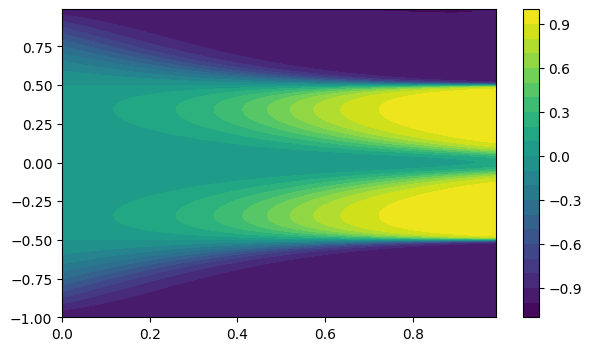

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


ob_x=np.arange(-1,1,0.01)
ob_t=np.arange(0,1,0.01)
ms_x, ms_t= np.meshgrid(ob_x,ob_t)

ob_x = np.ravel(ms_x).reshape(-1,1)
ob_t = np.ravel(ms_t).reshape(-1,1)

pt_x = Variable(torch.from_numpy(ob_x).float(), requires_grad=False).to(device)
pt_t = Variable(torch.from_numpy(ob_t).float(), requires_grad=False).to(device)

fig = plt.figure(figsize=(7,4))

pt_u3 = net_AC(N*pt_x,1*pt_t)

u3 = pt_u3.data.cpu().numpy()
ms_u3 = u3.reshape(ms_x.shape)

u3 = pt_u3.data.cpu().numpy()


plt.contourf(ms_t, ms_x , ms_u3, levels=20)

plt.colorbar()

plt.show()